In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannotations import add_stat_annotation
#from pandas.compat import StringIO

sns.set(style="whitegrid")

### Boxplot non-hue

#### Multiple comparisons correction by default

By default, multiple comparisons correction (Bonferroni method) is applied.

In [2]:
df = sns.load_dataset("tips")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02


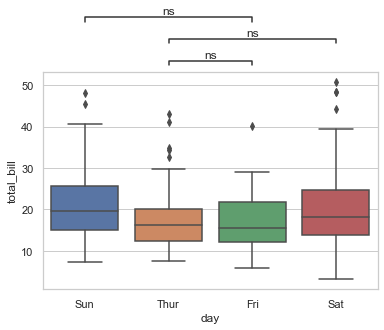

In [3]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
ax, test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

#### Statistical test results

The `add_stat_annotation` function returns the tuple `ax, test_results`, where `test_results` is a list of `StatResult` objects, containing both the original data of the boxes and the statistical test results (p-value, etc).

In [4]:
for res in test_results:
    print(res)

print("\nStatResult attributes:", test_results[0].__dict__.keys())

Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02

StatResult attributes: dict_keys(['test_description', 'test_short_name', 'stat_str', 'stat_value', 'pval', '_corrected_significance', '_correction_method', 'alpha', 'box1', 'box2'])


#### No multiple comparisons correction

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


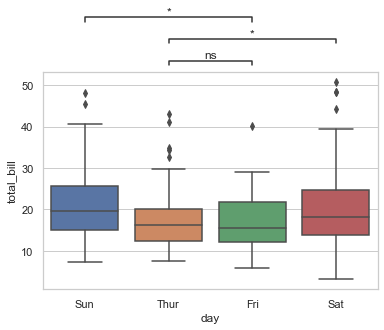

In [5]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   test='Mann-Whitney', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=2)

#### Location

Statistical test annotation can be either drawn inside the plot area (`loc='inside'`), or on top on it (`loc='outside'`).

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Sun v.s. Thur: Custom statistical test with Bonferroni correction, P_val:1.000e-01
Sun v.s. Fri: Custom statistical test with Bonferroni correction, P_val:1.000e-03
Sun v.s. Sat: Custom statistical test with Bonferroni correction, P_val:1.000e-01


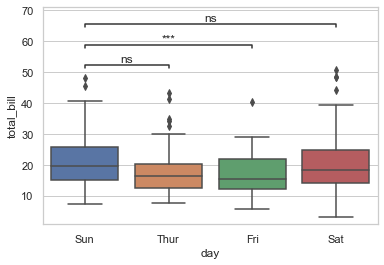

In [6]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")],
                    perform_stat_test=False, pvalues=[0.1, 0.1, 0.001],
                    test=None, text_format='star', loc='inside', verbose=2)
plt.savefig('example_non-hue_inside.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

We create boxes with unequal ymax position.

In [7]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

E_Ideal v.s. E_Premium: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.404e-30 U_stat=3.756e+06
I_Ideal v.s. I_Premium: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.627e-60 U_stat=1.009e+06
J_Ideal v.s. J_Premium: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.616e-36 U_stat=2.337e+05
E_Ideal v.s. E_Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.681e-18 U_stat=1.480e+06
I_Ideal v.s. I_Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.507e-12 U_stat=4.359e+05
J_Ideal v.s. J_Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.056e-04 U_stat=1.174e+05
E_Ideal v.s. E_Very Good: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.562e-01 U_stat

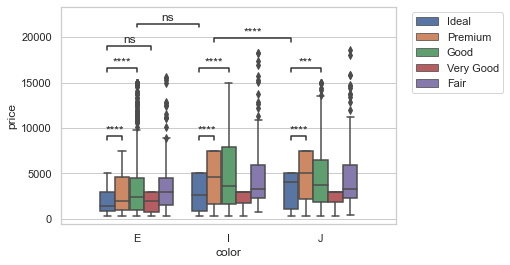

In [8]:
x = "color"
y = "price"
hue = "cut"
order = ["E", "I", "J"]
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
add_stat_annotation(ax, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order,
                    box_pairs=box_pairs, test='Mann-Whitney', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [9]:
df = sns.load_dataset("tips")
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_bucket
0,16.99,1.01,Female,No,Sun,Dinner,2,"(0.991, 4.0]"
1,10.34,1.66,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
2,21.01,3.50,Male,No,Sun,Dinner,3,"(0.991, 4.0]"
3,23.68,3.31,Male,No,Sun,Dinner,2,"(0.991, 4.0]"
4,24.59,3.61,Female,No,Sun,Dinner,4,"(0.991, 4.0]"


In [10]:
# In this case we just have to pass the list of categories objects to the add_stat_annotation function.
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

[(0.991, 4.0], (4.0, 7.0], (7.0, 10.0]]
Categories (3, interval[float64]): [(0.991, 4.0] < (4.0, 7.0] < (7.0, 10.0]]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Fri_(0.991, 4.0] v.s. Sat_(7.0, 10.0]: t-test independent samples with Bonferroni correction, P_val:6.176e-07 stat_value=-7.490e+00


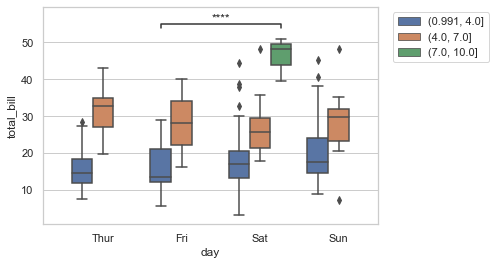

In [11]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
                    test='t-test_ind', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_bucketed.png', dpi=300, bbox_inches='tight')

### Barplot with hue

Note: Support for barplot has not been fully implemented yet.

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SI2_I v.s. SI2_J: t-test independent samples with Bonferroni correction, P_val:1.000e+00 stat_value=-8.949e-01
SI1_I v.s. SI1_J: t-test independent samples with Bonferroni correction, P_val:7.662e-04 stat_value=-3.937e+00
VS2_I v.s. VS2_J: t-test independent samples with Bonferroni correction, P_val:6.125e-02 stat_value=-2.709e+00
I1_I v.s. I1_J: t-test independent samples with Bonferroni correction, P_val:2.614e-01 stat_value=-2.206e+00
VS1_I v.s. VS1_J: t-test independent samples with Bonferroni correction, P_val:8.226e-04 stat_value=-3.923e+00
VVS2_I v.s. VVS2_J: t-test independent samples with Bonferroni correction, P_val:8.168e-13 stat_value=-7.672e+00
VVS1_I v.s. VVS1_J: t-test independent samples with Bonferroni correction, P_val:5.882e-09 stat_value=-6.321e+00
IF_I v.s. IF_J: t-test independent samples with Bonferron

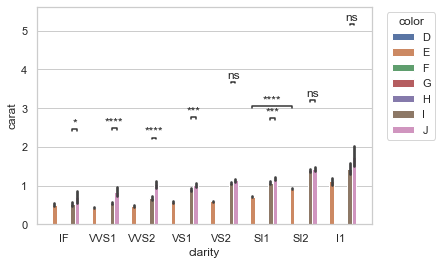

In [12]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]

x = "clarity"
y = "carat"
hue = "color"
# hue_order=['Ideal', 'Premium']
box_pairs = [
    (("SI2", "E"), ("SI1", "E"))
    ]
box_pairs = box_pairs + [((clar, 'I'), (clar, 'J')) for clar in df['clarity'].unique()]
width = 0.4
ax = sns.barplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, plot='barplot', data=df, x=x, y=y, hue=hue,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)
plt.savefig('example_barplot_hue.png', dpi=300, bbox_inches='tight')

### Tuning y offsets

![](example_tuning_y_offsets_w_arguments.png)

Sat_Yes v.s. Sat_No: t-test independent samples, P_val:4.304e-01 stat_value=7.922e-01
Thur_No v.s. Fri_No: t-test independent samples, P_val:7.425e-01 stat_value=-3.305e-01
Thur_Yes v.s. Sun_No: t-test independent samples, P_val:5.623e-01 stat_value=-5.822e-01


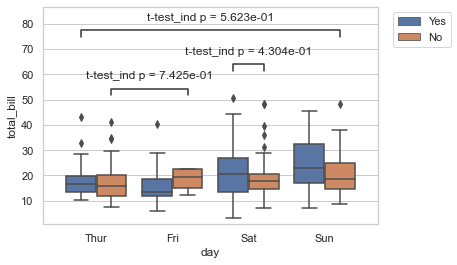

In [13]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue,
                    box_pairs=[(("Thur", "No"), ("Fri", "No")),
                                 (("Sat", "Yes"), ("Sat", "No")),
                                 (("Sun", "No"), ("Thur", "Yes"))
                                ],
                    test='t-test_ind', text_format='full', loc='inside', comparisons_correction=None,
                    line_offset_to_box=0.2, line_offset=0.1, line_height=0.05, text_offset=8,
                    verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

### Custom p-values as input

In [14]:
df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

box_pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in box_pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

Performing Bartlett statistical test for equal variances on pair: ('setosa', 'versicolor') stat=6.89e+00 p-value=8.66e-03
Performing Bartlett statistical test for equal variances on pair: ('setosa', 'virginica') stat=1.60e+01 p-value=6.38e-05
Performing Bartlett statistical test for equal variances on pair: ('versicolor', 'virginica') stat=2.09e+00 p-value=1.48e-01
pvalues: [0.008659557933880048, 6.378941946712554e-05, 0.14778816016231236]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

setosa v.s. versicolor: Custom statistical test with Bonferroni correction, P_val:8.660e-03
versicolor v.s. virginica: Custom statistical test with Bonferroni correction, P_val:1.478e-01
setosa v.s. virginica: Custom statistical test with Bonferroni correction, P_val:6.379e-05


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe621b7bc88>,
  <statannotations.stats.StatResult.StatResult at 0x7fe624ab4320>])

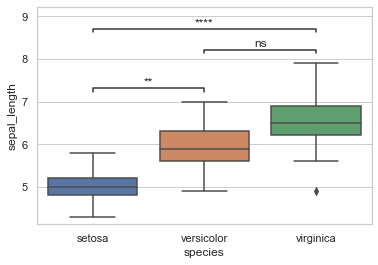

In [15]:
ax = sns.boxplot(data=df, x=x, y=y)
test_results = add_stat_annotation(ax, data=df, x=x, y=y,
                                   box_pairs=box_pairs,
                                   perform_stat_test=False, pvalues=pvalues, test_short_name=test_short_name,
                                   text_format='star', verbose=2)
test_results

### Custom annotation texts

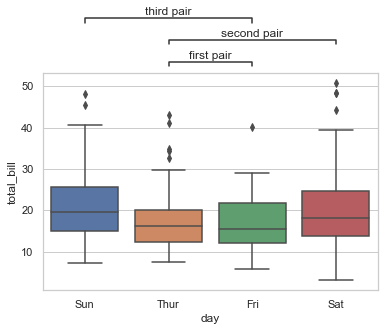

In [16]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")],
                                   text_annot_custom=["first pair", "second pair", "third pair"],
                                   perform_stat_test=False, pvalues=[0, 0, 0],
                                   loc='outside', verbose=0)
plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')